# ***EXPLORATORY DATA ANALYS: Bike Sharing Dataset***
- Name: Salsabilla Azzahra
- Gmail: salsaabillz04@gmail.com
- Id Dicoding: salsabill_azz

## Business Questions
- Comparison of the number of casual users with registered users on total bike sharing users
- What are the peak hours for bike sharing user?
- How do weather conditions affect bike sharing user?
- Which day of the week sees the highest bike sharing user activity
- Which season has the most bike sharing users


## Prepare the Library

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## ***Data Wrangling***

### ***Gathering Data***

In [209]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [210]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### ***About The Data***

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA.
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

* instant: record index
* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
  * Clear, Few clouds, Partly cloudy, Partly cloudy
  * Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

### ***Assesing Data***

### ***Day df***

In [211]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


***Changed some column header names to make it easier to understand***

In [212]:
day_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'weathersit':'weather',
                    'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity', 'casual':'casual_user',
                    'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

***Change the data type of the date column from object to datetime***

In [213]:
datetime_columns = ['date']

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   date              731 non-null    datetime64[ns]
 2   season            731 non-null    int64         
 3   year              731 non-null    int64         
 4   month             731 non-null    int64         
 5   holiday           731 non-null    int64         
 6   day               731 non-null    int64         
 7   workingday        731 non-null    int64         
 8   weather           731 non-null    int64         
 9   temperature       731 non-null    float64       
 10  temperature_feel  731 non-null    float64       
 11  humidity          731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  casual_user       731 non-null    int64         
 14  registered_user   731 non-

In [214]:
#Check missing values
day_df.isna().sum()

instant             0
date                0
season              0
year                0
month               0
holiday             0
day                 0
workingday          0
weather             0
temperature         0
temperature_feel    0
humidity            0
windspeed           0
casual_user         0
registered_user     0
total_user          0
dtype: int64

***Insight:***
- There is no missing values on the day_df so we dont have to drop any data

In [215]:
# Duplicates data check
print("Number of Duplicates: ", day_df.duplicated().sum())

Number of Duplicates:  0


***Insight:***
- There is no duplicates data so we dont have to drop any data from day_df

In [216]:
day_df.describe()

,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [217]:
day_df.head()

,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


***Change season name from numeric names into actual season names***
- 1: Springer
- 2: Summer
- 3: Fall
- 4: Winter

In [218]:
# Mapping season
season_mapping = {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"}

for i in range(len(day_df)):
    day_df.loc[i, 'season'] = season_mapping[day_df.loc[i, 'season']]

day_df.head()

C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\327299061.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Springer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[i, 'season'] = season_mapping[day_df.loc[i, 'season']]


,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


***Change the year name from numeric names into actual year***
- 0: 2011
- 1: 2012

In [219]:
year_mapping = {0: 2011, 1: 2012}

for i in range(len(day_df)):
    day_df.loc[i, 'year'] = year_mapping[day_df.loc[i, 'year']]


***Change the columns names: month, day, workingday numeric names into actual names***

for workingday column:
- 0 = weekend/holiday
- 1 = working day


In [220]:
month_mapping = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

day_mapping = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

workingday_mapping = {0: 'weekend/holiday', 1: 'working day'}

for i in range(len(day_df)):
    day_df.loc[i, 'month'] = month_mapping[day_df.loc[i, 'month']]
    day_df.loc[i, 'day'] = day_mapping[day_df.loc[i, 'day']]
    day_df.loc[i, 'workingday'] = workingday_mapping[day_df.loc[i, 'workingday']]

day_df.head()

C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\1771272546.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'january' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[i, 'month'] = month_mapping[day_df.loc[i, 'month']]
C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\1771272546.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'sunday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[i, 'day'] = day_mapping[day_df.loc[i, 'day']]
C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\1771272546.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'weekend/holiday' has dtype incompatible with int64, please explicitly cast to a compatible dtyp

,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,january,0,sunday,weekend/holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,january,0,monday,weekend/holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,january,0,tuesday,working day,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,january,0,wednesday,working day,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,january,0,thursday,working day,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


also change the weather name from weather column into actual weather name
* 1: clear
* 2: mist
* 3: light snow
* 4: heavy rain

In [221]:
weather_mapping = {1: 'clear', 2: 'mist', 3: 'light snow', 4:'heavy rain'}
for i in range(len(day_df)):
    day_df.loc[i, 'weather'] = weather_mapping[day_df.loc[i, 'weather']]

day_df.head()

C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\3801412402.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'mist' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[i, 'weather'] = weather_mapping[day_df.loc[i, 'weather']]


,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,january,0,sunday,weekend/holiday,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,january,0,monday,weekend/holiday,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,january,0,tuesday,working day,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,january,0,wednesday,working day,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,january,0,thursday,working day,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### ***Hour df***

In [222]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [223]:
#Check missing values
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

***Insight:***
- We dont have to drop any data because there is no missing values

In [224]:
# Duplicates data check
print("Number of Duplicates: ", hour_df.duplicated().sum())

Number of Duplicates:  0


***Insight:***
- Same like day_df, hour_df doesnt have any duplicates data

***Change some column header names to make it easier to understand***

In [225]:
hour_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour','weekday':'day', 'weathersit':'weather',
                    'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity', 'casual':'casual_user',
                    'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

***Change season name from numeric names into actual season names***
- 1: Springer
- 2: Summer
- 3: Fall
- 4: Winter

In [226]:
# Mapping season
season_mapping = {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"}

for i in range(len(hour_df)):
    hour_df.loc[i, 'season'] = season_mapping[hour_df.loc[i, 'season']]

day_df.head()

C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\3538632501.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Springer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[i, 'season'] = season_mapping[hour_df.loc[i, 'season']]


,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,january,0,sunday,weekend/holiday,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,january,0,monday,weekend/holiday,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,january,0,tuesday,working day,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,january,0,wednesday,working day,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,january,0,thursday,working day,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


***Change the year name from numeric names into actual year***
- 0: 2011
- 1: 2012

In [227]:
year_mapping = {0: 2011, 1: 2012}

for i in range(len(hour_df)):
    hour_df.loc[i, 'year'] = year_mapping[hour_df.loc[i, 'year']]

***Change month, day, workingday numeric names into actual names***

for workingday column:
- 0 = weekend/holiday
- 1 = working day


In [228]:
month_mapping = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

day_mapping = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

workingday_mapping = {0: 'weekend/holiday', 1: 'working day'}

for i in range(len(hour_df)):
    hour_df.loc[i, 'month'] = month_mapping[hour_df.loc[i, 'month']]
    hour_df.loc[i, 'day'] = day_mapping[hour_df.loc[i, 'day']]
    hour_df.loc[i, 'workingday'] = workingday_mapping[hour_df.loc[i, 'workingday']]

hour_df.head()

C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\819036375.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'january' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[i, 'month'] = month_mapping[hour_df.loc[i, 'month']]
C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\819036375.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'sunday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[i, 'day'] = day_mapping[hour_df.loc[i, 'day']]
C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\819036375.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'weekend/holiday' has dtype incompatible with int64, please explicitly cast to a compatible dty

,instant,date,season,year,month,hour,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,january,0,0,sunday,weekend/holiday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,january,1,0,sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,january,2,0,sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,january,3,0,sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,january,4,0,sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,0,1,1


also change the weather name from weather column into actual weather name
* 1: clear
* 2: mist
* 3: light snow
* 4: heavy rain

In [229]:
weather_mapping = {1: 'clear', 2: 'mist', 3: 'light snow', 4:'heavy rain'}
for i in range(len(hour_df)):
    hour_df.loc[i, 'weather'] = weather_mapping[hour_df.loc[i, 'weather']]

hour_df.head()

C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\1657676496.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'clear' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[i, 'weather'] = weather_mapping[hour_df.loc[i, 'weather']]


,instant,date,season,year,month,hour,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,january,0,0,sunday,weekend/holiday,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,january,1,0,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,january,2,0,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,january,3,0,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,january,4,0,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0,0,1,1


Change the data type of the ***date*** column from object to datetime

In [230]:
datetime_columns = ['date']

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   date              17379 non-null  datetime64[ns]
 2   season            17379 non-null  object        
 3   year              17379 non-null  int64         
 4   month             17379 non-null  object        
 5   hour              17379 non-null  int64         
 6   holiday           17379 non-null  int64         
 7   day               17379 non-null  object        
 8   workingday        17379 non-null  object        
 9   weather           17379 non-null  object        
 10  temperature       17379 non-null  float64       
 11  temperature_feel  17379 non-null  float64       
 12  humidity          17379 non-null  float64       
 13  windspeed         17379 non-null  float64       
 14  casual_user       1737

# ***Exploratory Data Analysis***

#### ***Day Dataset***

In [231]:
day_df.describe(include='all')

,instant,date,season,year,month,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731,731.000000,731,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,january,NaN,sunday,working day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


***Insight:***
- Based on the results of the statistical parameters, the season with the highest frequency of bike sharing user is the spring season.

In [232]:
day_df.groupby(by="day").agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["sum", "mean"]
})

date casual_user registered_user total_user             
          nunique         sum             sum        sum         mean
day                                                                  
friday        104       61460          423935     485395  4667.259615
monday        105      140521          303506     444027  4228.828571
saturday      104       78238          409552     487790  4690.288462
sunday        105      153852          323955     477807  4550.542857
thursday      104       57319          415729     473048  4548.538462
tuesday       105       70784          384719     455503  4338.123810
wednesday     104       57843          411266     469109  4510.663462

***Insight:***
- We can see that the days with the highest number of bike sharing users is Saturday with 487.790 users.
- The least users are on the monday, which is 444.027 users.

In [233]:
# Kelompokkan data berdasarkan season dan ambil bulan-bulan unik
season_months = day_df.groupby('season')['month'].unique()

# Tampilkan hasil
print(season_months)


season
Fall                 [june, july, august, september]
Springer        [january, february, march, december]
Summer                     [march, april, may, june]
Winter      [september, october, november, december]
Name: month, dtype: object


***Insight:***
- As a result of the data above, we can see the seasonal patterns that occur.

In [248]:
day_df.groupby(by=['year', 'season', "month"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["sum", "mean"]
})

date casual_user registered_user total_user  \
                        nunique         sum             sum        sum   
year season   month                                                      
2011 Fall     august         31       28842          107849     136691   
              july           31       36452          104889     141341   
              june           10       10313           39413      49726   
              september      22       19843           72049      91892   
     Springer december       11        3153           19237      22390   
              february       28        6242           41973      48215   
              january        31        3073           35116      38189   
              march          20        8957           32249      41206   
     Summer   april          30       22346           72524      94870   
              june           20       20299           73487      93786   
              march          11        3869           18970      22839   
              may            31       31050          104771     135821   
     Winter   december       20        5295           59638      64933   
              november       30       15594           86573     102167   
              october        31       25222           98289     123511   
              september       8        6702           28824      35526   
2012 Fall     august         31       43197          171306     214503   
              july           31       41705          161902     203607   
              june           10       13448           52214      65662   
              september      22       32291          125416     157707   
     Springer december       11        3310           17298      20608   
              february       29        8721           94416     103137   
              january        31        8969           87775      96744   
              march          20       18197           82662     100859   
     Summer   april          30       38456          135768     174224   
              june           20       29846          107322     137168   
              march          11       13421           50595      64016   
              may            31       44235          151630     195865   
     Winter   december       20        9935           93170     103105   
              november       30       21009          131655     152664   
              october        31       34538          164303     198841   
              september       8       11487           49379      60866   

                                      
                                mean  
year season   month                   
2011 Fall     august     4409.387097  
              july       4559.387097  
              june       4972.600000  
              september  4176.909091  
     Springer december   2035.454545  
              february   1721.964286  
              january    1231.903226  
              march      2060.300000  
     Summer   april      3162.333333  
              june       4689.300000  
              march      2076.272727  
              may        4381.322581  
     Winter   december   3246.650000  
              november   3405.566667  
              october    3984.225806  
              september  4440.750000  
2012 Fall     august     6919.451613  
              july       6567.967742  
              june       6566.200000  
              september  7168.500000  
     Springer december   1873.454545  
              february   3556.448276  
              january    3120.774194  
              march      5042.950000  
     Summer   april      5807.466667  
              june       6858.400000  
              march      5819.636364  
              may        6318.225806  
     Winter   december   5155.250000  
              november   5088.800000  
              october    6414.225806  
              september  7608.250000

***Insight:***
- In 2011 the most Bike Sharing users were in July especially in fall season with a total of 143.512 users. While the least users were in December with springer season, just 22.390 users.
- In 2012 the most Bike Sharing users were in August and the season is Fall with a total of 214.503 users. While the least users were in December with springer season, just 20.608 users.

In [235]:
day_df.groupby(by=['season', "weather"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["sum", "mean"]
})

date casual_user registered_user total_user  \
                    nunique         sum             sum        sum   
season   weather                                                     
Fall     clear          136      167945          631498     799443   
         light snow       4        1739            9268      11007   
         mist            48       56407          194272     250679   
Springer clear          111       41562          270474     312036   
         light snow       4         281            3458       3739   
         mist            66       18779          136794     155573   
Summer   clear          113      146388          480598     626986   
         light snow       3         420            3087       3507   
         mist            68       56714          231382     288096   
Winter   clear          103       90451          429036     519487   
         light snow      10        1455           18161      19616   
         mist            65       37876          264634     302510   

                                  
                            mean  
season   weather                  
Fall     clear       5878.257353  
         light snow  2751.750000  
         mist        5222.479167  
Springer clear       2811.135135  
         light snow   934.750000  
         mist        2357.166667  
Summer   clear       5548.548673  
         light snow  1169.000000  
         mist        4236.705882  
Winter   clear       5043.563107  
         light snow  1961.600000  
         mist        4654.000000

***Insight:***
- Based on the season and weather conditions, the most users are in fall with clear weather and the total is 799.443 users.

### ***Hour dataset***

In [236]:
hour_df.groupby(by=["workingday", "hour"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["mean", "sum"]
})

date casual_user registered_user  total_user        
                     nunique         sum             sum        mean     sum
workingday      hour                                                        
weekend/holiday 0        230        3829           17055   90.800000   20884
                1        230        2876           13111   69.508696   15987
                2        228        2371            9752   53.171053   12123
                3        227        1465            4386   25.775330    5851
                4        227         514            1362    8.264317    1876
                5        222         383            1546    8.689189    1929
                6        229         875            3417   18.742358    4292
                7        231        1988            8039   43.406926   10027
                8        231        4718           19688  105.653680   24406
                9        231       10399           29246  171.623377   39645
                10       231       18311           40804  255.909091   59115
                11       231       24637           48201  315.316017   72838
                12       231       29163           55443  366.259740   84606
                13       231       31514           54587  372.731602   86101
                14       231       32246           51987  364.645022   84233
                15       231       31532           51354  358.813853   82886
                16       231       29710           51770  352.727273   81480
                17       231       25829           48911  323.549784   74740
                18       230       19371           45272  281.056522   64643
                19       230       15076           38209  231.673913   53285
                20       230       10756           29434  174.739130   40190
                21       230        8314           24360  142.060870   32674
                22       230        6453           20241  116.060870   26694
                23       230        4402           15362   85.930435   19764
working day     0        496        3546           14700   36.786290   18246
                1        494        1833            6344   16.552632    8177
                2        487        1041            3188    8.683778    4229
                3        470         428            1895    4.942553    2323
                4        470         360            2192    5.429787    2552
                5        495         629           11703   24.913131   12332
                6        496        2142           48698  102.500000   50840
                7        496        6049          138095  290.612903  144144
                8        496       11043          225552  477.006048  236595
                9        496       12059          107734  241.518145  119793
                10       496       15478           51664  135.366935   67142
                11       496       18649           59833  158.229839   78482
                12       497       20555           79253  200.820926   99808
                13       498       21199           77619  198.429719   98818
                14       498       22843           68576  183.572289   91419
                15       498       23074           77189  201.331325  100263
                16       499       24124          122144  293.122244  146268
                17       499       28391          233729  525.290581  262120
                18       498       25125          220004  492.226908  245129
                19       498       20429          153075  348.401606  173504
                20       498       15622          108738  249.718876  124360
                21       498       12256           80515  186.287149   92771
                22       498        9747           59171  138.389558   68918
                23       498        6663           37514   88.708835   44177

***Insight:***
- The peak hours for bike sharing user on weekend or holiday is range 13.00 pm the total is 86.101 Users. On the working day the peak hours for the bike sharing user is on 17.00 pm, the total is 262.120 users.

In [237]:
hour_df.groupby(by=["season", "weather"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                    nunique         sum             sum        max min   
season   weather                                                         
Fall     clear          183      174014          627927        977   1   
         light snow      72        9727           36529        891   1   
         mist           140       42350          170582        868   2   
Springer clear          174       44462          280816        801   1   
         heavy rain       3           8             215        164  23   
         light snow      75        1392           20250        520   1   
         mist           146       14760          109445        712   1   
Summer   clear          177      151197          513266        873   1   
         light snow      91        7413           39350        782   1   
         mist           146       44912          162451        957   1   
Winter   clear          166       93072          453419        967   1   
         light snow      62        4251           39419        856   1   
         mist           135       32459          218993        905   1   

                                         
                           mean     sum  
season   weather                         
Fall     clear       244.494207  801941  
         light snow  171.955390   46256  
         mist        224.848997  212932  
Springer clear       122.055535  325278  
         heavy rain   74.333333     223  
         light snow   58.650407   21642  
         mist        103.074689  124205  
Summer   clear       232.410983  664463  
         light snow  115.179803   46763  
         mist        181.261364  207363  
Winter   clear       209.463779  546491  
         light snow  116.453333   43670  
         mist        201.483974  251452

***Insight:***
- The season with the lowest total user is on spring with heavy rain weather. The total is 223 users.

## **Data Visualization & Explanatory Analysis**

#### ***Comparison of the number of casual users with registered users on total bike sharing users***

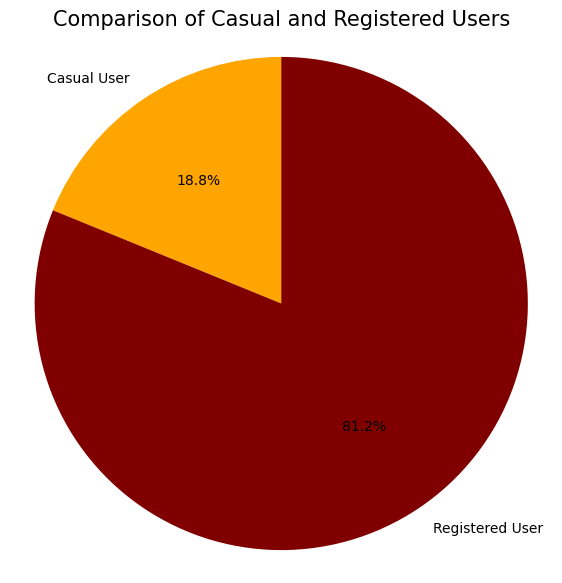

In [250]:
# Count the total user for casual dan registered
total_casual = hour_df['casual_user'].sum()
total_registered = hour_df['registered_user'].sum()

# make data and labels for pie chart
labels = ['Casual User', 'Registered User']
sizes = [total_casual, total_registered]
colors = ['#FFA500', '#800000']

# make pie chart
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Comparison of Casual and Registered Users', fontsize=15)
plt.axis('equal')  # Agar pie chart bulat
plt.show()

***Insight:***
- Based on the piechart above, we can see that users on bike sharing are dominated by registered users at 81.2% of the total bike sharing users 2011-2012.

#### ***What are the peak time for bike sharing user?***


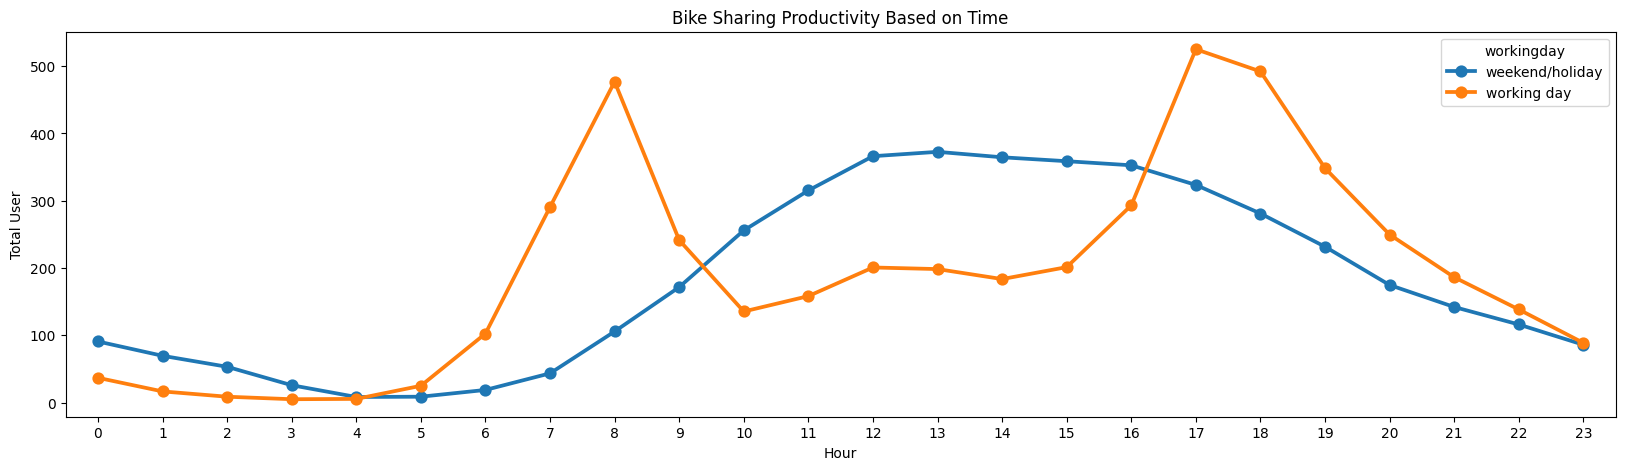

In [239]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour_df, x='hour', y='total_user', hue='workingday', errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity Based on Time')
ax.set_ylabel('Total User')
ax.set_xlabel('Hour')
plt.show()

***Insight:***
- On holidays or weekends the most bike sharing users occur at 1:00 pm.
- On weekdays, the most crowded times are 8:00 am, 5:00 pm - 6:00 pm.

#### ***How do weather conditions affect bike sharing user?***

In [240]:
byweather_df = hour_df.groupby("weather").total_user.sum().sort_values(ascending=False).reset_index()
byweather_df


,weather,total_user
0,clear,2338173
1,mist,795952
2,light snow,158331
3,heavy rain,223


C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\1900829221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\1900829221.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


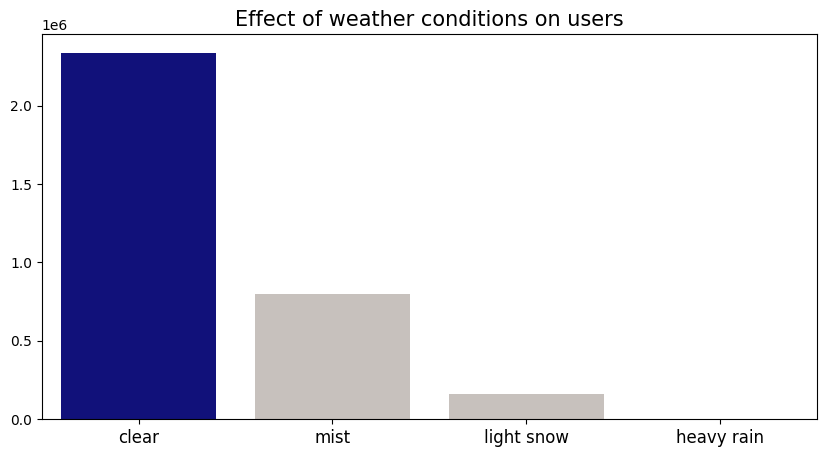

In [253]:
colors = ["#00008B", "#C9C0BB", "#C9C0BB", "#C9C0BB", "#C9C0BB"]
plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_user", 
    x="weather",
    data=byweather_df.sort_values(by="total_user", ascending=False),
    palette=colors
)
plt.title("Effect of weather conditions on users", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

***Insight:***
- The majority of bike sharing users favor cycling in sunny weather.

#### ***Which day of the week sees the highest bike sharing user activity?***

In [242]:
bydays_df = hour_df.groupby("day").total_user.sum().sort_values(ascending=False).reset_index()
bydays_df

,day,total_user
0,saturday,487790
1,friday,485395
2,sunday,477807
3,thursday,473048
4,wednesday,469109
5,tuesday,455503
6,monday,444027


C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\771022858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


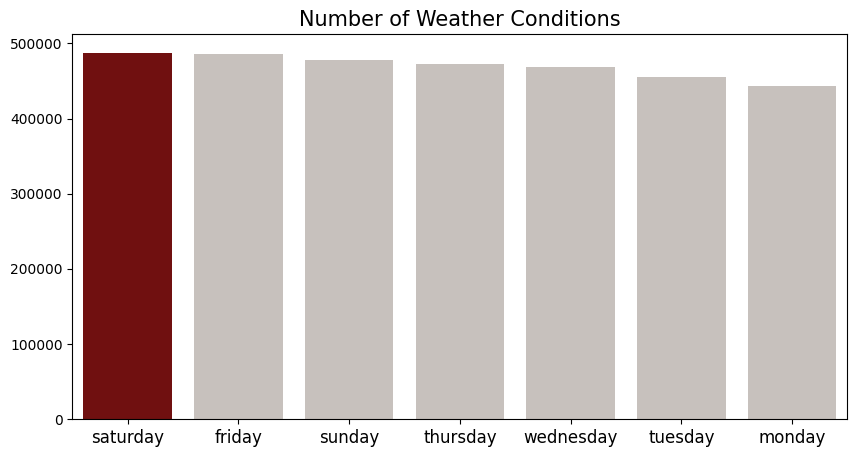

In [243]:
colors = ["#800000", "#C9C0BB", "#C9C0BB", "#C9C0BB", "#C9C0BB", "#C9C0BB", "#C9C0BB"]
plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_user", 
    x="day",
    data=bydays_df.sort_values(by="total_user", ascending=False),
    palette=colors
)
plt.title("Number of Weather Conditions", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

***Insight:***
- The day with the most bike sharing users is Saturday. Where on this day people usually spend time for refreshing by cycling.

#### ***Which season has the most bike sharing users?***

In [244]:
byseason_df = hour_df.groupby("season").total_user.sum().sort_values(ascending=False).reset_index()
byseason_df

,season,total_user
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Springer,471348


C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\2314480239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\salsa\AppData\Local\Temp\ipykernel_11260\2314480239.py:3: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(


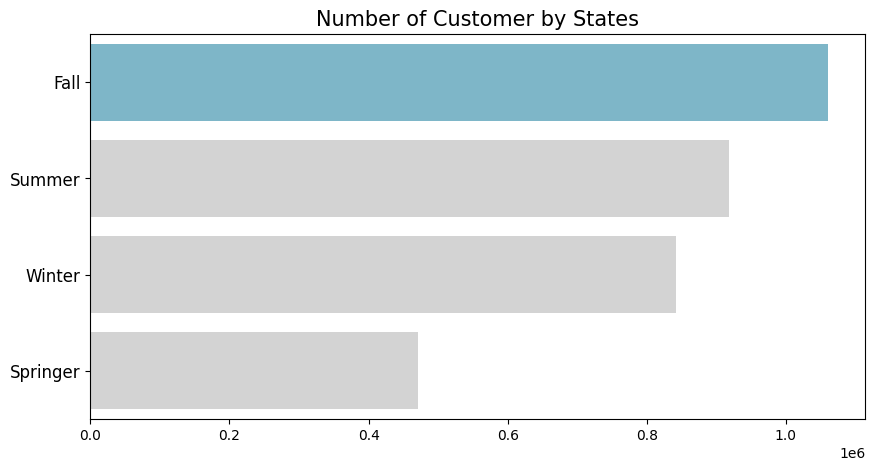

In [245]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="total_user", 
    y="season",
    data=byseason_df.sort_values(by="total_user", ascending=False),
    palette=colors_
)
plt.title("Seasons with the most bike sharing users", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()
     

***Insight:***
- Fall is the most popular season for bike sharing users, with the most users cycling during this season.

# ***Conclusion***
The analysis of bike-sharing data from 2011-2012 provides several key insights into user behavior and trends:

- User Demographics: Registered users dominate the bike-sharing system, making up 81.2% of the total user base. This shows that most users are frequent cyclists who benefit from the registration system.

- Peak Usage Times: 
    - On holidays or weekends, the peak time for bike usage is around 1:00 pm, likely when people are more relaxed and have leisure time.
    - On weekdays, the most popular times for cycling are during commuting hours, specifically 8:00 am and 5:00-6:00 pm, suggesting that many users rely on bike-sharing for commuting to and from work.

- Weather Preferences: The majority of users prefer cycling in sunny weather, indicating that pleasant weather conditions encourage higher participation in bike-sharing.

- Day of the Week: Saturday sees the highest number of bike-sharing users, which aligns with people using weekends for recreational activities, including cycling.

- Seasonal Trends: The fall season emerges as the most popular time for bike-sharing, potentially due to the favorable weather conditions and scenic nature of autumn, which may encourage more cycling activity.

These insights can help in optimizing bike-sharing services, such as scheduling maintenance during off-peak hours or adjusting resources based on expected usage patterns.

In [252]:
hour_df.to_csv("hour_cleaned.csv", index=False)

In [247]:
hour_df

,instant,date,season,year,month,hour,holiday,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,Springer,2011,january,0,0,sunday,weekend/holiday,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Springer,2011,january,1,0,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Springer,2011,january,2,0,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Springer,2011,january,3,0,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Springer,2011,january,4,0,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,december,19,0,tuesday,working day,mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Springer,2012,december,20,0,tuesday,working day,mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Springer,2012,december,21,0,tuesday,working day,clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Springer,2012,december,22,0,tuesday,working day,clear,0.26,0.2727,0.56,0.1343,13,48,61
